In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
from IPython import display # If using IPython, Colab or Jupyter
import numpy as np

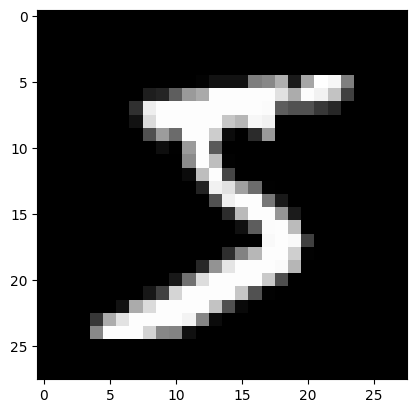

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
# Plot image data from x_train
plt.imshow(x_train[0], cmap = "gray")
plt.show()

In [ ]:
LATENT_SIZE = 32
encoder = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(64),
    LR(),
    Dropout(0.5),
    Dense(LATENT_SIZE, activation="sigmoid"),
])

In [ ]:
decoder = Sequential([
    Dense(64, input_shape = (LATENT_SIZE,)),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(784),
    Activation("sigmoid"),
    Reshape((28, 28))
])

In [ ]:
img = Input(shape = (28, 28))
latent_vector = encoder(img)
output = decoder(latent_vector)
model = Model(inputs = img, outputs = output)
model.compile("nadam", loss = "binary_crossentropy")

1/1 [==============================] - 0s 19ms/step


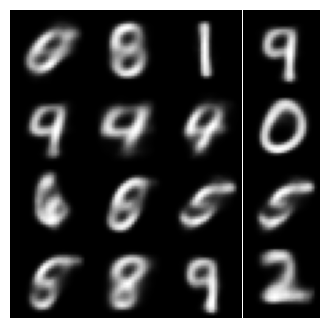

----------- EPOCH 49 -----------
938/938 [==============================] - 7s 7ms/step - loss: 0.1828


In [ ]:
EPOCHS = 50
#Only do plotting if you have IPython, Jupyter, or using Colab
for epoch in range(EPOCHS):
    fig, axs = plt.subplots(4, 4, figsize=(4,4))
    rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))

    display.clear_output() # If you imported display from IPython

    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(model.predict(rand[i, j])[0], cmap = "gray")
            axs[i, j].axis("off")

    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.show()
    print("-----------", "EPOCH", epoch, "-----------")
    model.fit(x_train, x_train, batch_size = 64)

1/1 [==============================] - 0s 17ms/step


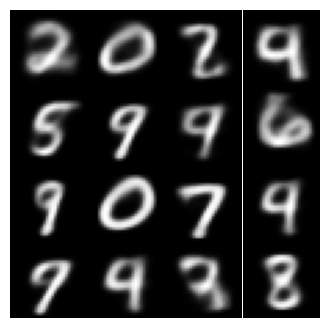

----------- EPOCH 19 -----------
157/157 [==============================] - 0s 3ms/step - loss: 0.1557
Validation Loss: 0.1557


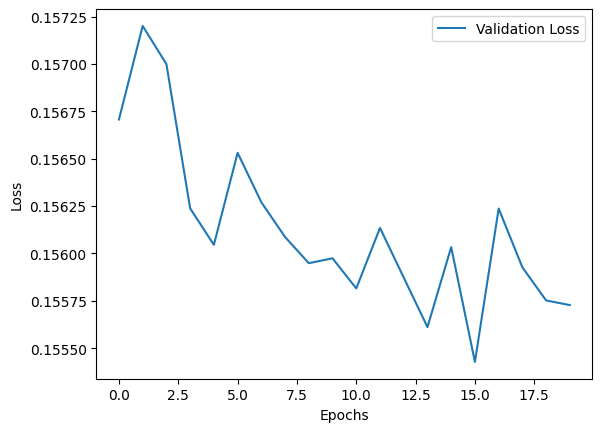

In [ ]:
# ... (your existing code)

EPOCHS = 20
validation_loss = []  # Initialize an empty list to store validation losses

for epoch in range(EPOCHS):
    fig, axs = plt.subplots(4, 4, figsize=(4,4))
    rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))

    display.clear_output() # If you imported display from IPython

    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(model.predict(rand[i, j])[0], cmap = "gray")
            axs[i, j].axis("off")

    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.show()
    print("-----------", "EPOCH", epoch, "-----------")
    model.fit(x_train, x_train, batch_size = 64)

    # Evaluate on validation set
    val_loss = model.evaluate(x_test, x_test, batch_size=64)
    validation_loss.append(val_loss)
    print(f"Validation Loss: {val_loss:.4f}")

# Plot the validation loss over epochs
plt.plot(range(EPOCHS), validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
